# Ajuste de Curvas

Ajuste linear de curvas ou retas.

* Gera uma relação quantitativa entre variáveis
* Ajusta os atributos de curvas propostas para um intervalo de pontos

#### Importar as biblioteas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import plot
import numpy as np
import matplotlib.pyplot as plt
import linsys

#### Definir o conjunto de pontos

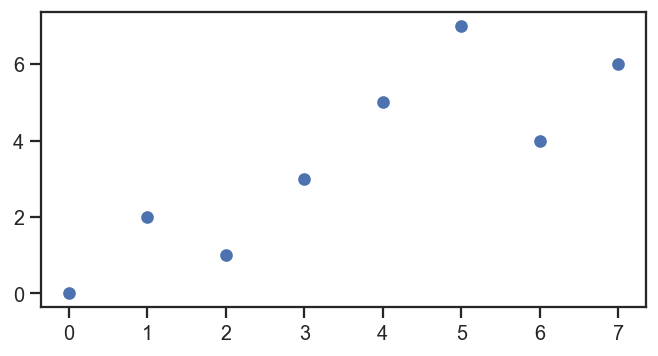

In [2]:
d = 2 #grau do polinômio a ser ajustado +1

P = [[0, 0],
     [1, 2],
     [2, 1],
     [3, 3],
     [4, 5],
     [5, 7],
     [6, 4],
     [7, 6]]

plt.figure(figsize=(6, 3), dpi=130)
for x,y in P : plt.plot(x, y, 'bo')
plt.show()

## Definição do método

### Método dos minimos quadrados

Dado uma distribuição de pontos, queremos construir $\hat{y} = a_0 + a_1x$, que é um polinômio que expressa a tendência da distribuição.

Cada ponto da curva possui uma diferença (também chamada de erro, possivelmente 0) de $y$ para $\hat{y}$.

<img src="squared_error.png" style="width: 40%;"></img>

Porém ao somar esses valores para obter o erro médio, podemos perder dados, cancelando diferenças positivas e negativas. Por isso, queremos calcular a diferença quadrada. A diferença quadrada de um ponto é definida como $d_i^2 = (\hat{y}_i-y_i)^2$, e

$$D = \sum_{i=1}^n d_i^2 = d_1^2 + d_2^2 + \cdots + d_n^2$$.

Reescrevendo D, $D = \sum [(a_0+a_1x_i)-y_i]^2$, e queremos minimizar esse valor. Derivando parcialmente para os atributos da função, e utilizando a regra da cadeia:

$\frac{\partial f}{\partial a_0} = \sum 2 [(a_0+a_1x_i)-y_i]^1 \cdot 1$

$\frac{\partial f}{\partial a_1} = \sum 2 [(a_0+a_1x_i)-y_i]^1 \cdot x_i$

Igualando os dois lados a 0, temos um sistema linear.

$2 \sum a_0+a_1x_i-y_i = 0$

$2 \sum a_0x_i+a_1x_i^2-y_ix_i = 0$

$\ $

$\sum a_0 + \sum a_1x_i = \sum y_i$

$\sum a_0x_i + \sum a_1x_i^2 = \sum y_ix_i$

$\ $

$a_0 n + a_1 \sum x_i = \sum y_i$

$ a_0 \sum x_i + a_1 \sum x_i^2 = \sum y_ix_i$

Logo,

$$
\begin{pmatrix}
n & \sum x_i \\
\sum x_i & \sum x_i^2
\end{pmatrix}
\cdot
\begin{pmatrix}
a_0 \\
a_1
\end{pmatrix}
=
\begin{pmatrix}
\sum y_i \\
\sum x_iy_i
\end{pmatrix}
$$

### Solução Matricial

$$
\begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix}
\cdot
\begin{pmatrix}
a_0 \\
a_1
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_n
\end{pmatrix}
$$

Porém, esse sistema $A_{n \times 2} \cdot \vec{x}_{2 \times 1} = \vec{y}_{n \times 1}$ é impossível, já que se os pontos não forem alinhados, não existirá reta. Mas, podemos multiplicar um elemento dos dois lados, pela esquerda:

$$A^T_{2 \times n} \cdot A_{n \times 2} \cdot \vec{x}_{2 \times 1} = A^T_{2 \times n} \cdot \vec{y}_{n \times 1}$$

Assim, se o grau do polinômio desejável for $m+1$, sempre será possível obter uma solução, com as partes sendo:

$$
A^TA = 
\begin{pmatrix}
n & \sum x_i & \sum x_i^2 & \cdots & \sum x_i^m \\
\sum x_i & \sum x_i^2 & \sum x_i^3 & \cdots & \sum x_i^{m+1} \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4 & \cdots & \sum x_i^{m+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum x_i^{m} & \sum x_i^{m+1} & \sum x_i^{m+2} & \cdots & \sum x_i^{2m} \\
\end{pmatrix}
$$

$$
A^T\vec{y} = 
\begin{pmatrix}
\sum y_i \\
\sum y_ix_i \\
\sum y_ix_i^2 \\
\vdots \\
\sum y_ix_{m}
\end{pmatrix}
$$

Nota: Se $n-1=m$, não é feito ajuste de curvas, é feito interpolação.

In [3]:
A = np.array([[x**i for i in range(d)] for x,_ in P])
B = np.array([[y] for _,y in P])
if B.shape[0]!=A.shape[0] : B = B.T
assert A.shape[0]==B.shape[0]

for x,y in zip(A,B) : print(x,y)

[1 0] [0]
[1 1] [2]
[1 2] [1]
[1 3] [3]
[1 4] [5]
[1 5] [7]
[1 6] [4]
[1 7] [6]


[[0.5       ]
 [0.85714286]]


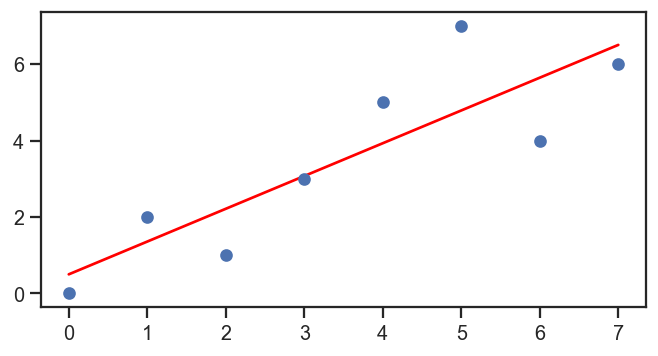

In [4]:
C = A.T.dot(A)
D = A.T.dot(B)
#print(C,D,sep='\n')

coef = linsys.invMatSolve(C,D)
print(coef)

f = lambda x : sum(coef[i]*(x**i) for i in range(len(coef)))
xarr = np.linspace(P[0][0],P[-1][0],100)

plt.figure(figsize=(6, 3), dpi=130)
plt.plot(xarr, f(xarr), 'red', label="Polinômio Ajustado")
for x,y in P : plt.plot(x, y, 'bo')
plt.show()

### Coeficiente de determinação ($R^2$)

O $R^2$ define-se como a razão entre um ajuste bom e um ajuste ruim.

<img src="r2.png" style="width: 40%;"></img>

O ajuste ruim será o ajuste médio $\bar{D}$, tal que:

$$\bar{D} = \sum_{i=1}^n (y_i - \bar{y})^2; \bar{y} = \frac{\sum_{i=1}^n y_i}{n}$$

Note que $\bar{D}\geq\hat{D}$.

A partir disso, podemos calcular o coeficiente:

$$R^2 = 1 - \frac{\hat{D}}{\bar{D}}$$

Com a subtração, e considerando que é uma fração própria, $0 \leq R^2 \leq 1$.

In [5]:
avg = sum(y for _,y in P)/len(P)
r2 = 1-sum((y-f(x))**2 for x,y in P)/sum((y-avg)**2 for _,y in P)

print(r2)

[0.73469388]
